# A Mini Project Analyzing School Attendance Rates from 2021-2022

## By Lindsay Toothaker and Savannah Dorey

### Data Source

The dataset is downloaded from [Data.gov](https://catalog.data.gov/dataset/school-attendance-by-student-group-and-district-2021-2022). The data was collected from 2021-2022 and updated in 2023. It includes attendance rate data on U.S. public school students by district and student group from PK-12. We intend on answer questions regarding which district and category of students have the highest and lowest attendance rates and if/how 


In [3]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv('s3://ia340-2024-fall-01/School_Attendance_by_Student_Group_and_District__2021-2022.csv') # load the data from s3
df.head() #show the top 5 rows

District code District name                    Category  \
0       00000CT   Connecticut                         NaN   
1       00000CT   Connecticut                Homelessness   
2       00000CT   Connecticut  Students With Disabilities   
3       00000CT   Connecticut          Free/Reduced Lunch   
4       00000CT   Connecticut          Free/Reduced Lunch   

                        Student group  2021-2022 student count - year to date  \
0                        All Students                                  500285   
1  Students Experiencing Homelessness                                    1814   
2          Students With Disabilities                                   78417   
3                  Free Meal Eligible                                  168984   
4         Reduced Price Meal Eligible                                   29905   

   2021-2022 attendance rate - year to date  2020-2021 student count  \
0                                     91.69                 496092.0   
1                                     83.48                   1735.0   
2                                     88.99                  76487.0   
3                                     88.51                 176225.0   
4                                     91.84                  30886.0   

   2020-2021 attendance rate  2019-2020 student count  \
0                      92.94                 508346.0   
1                      81.55                   3916.0   
2                      89.46                  80365.0   
3                      88.61                 193706.0   
4                      92.99                  27507.0   

   2019-2020 attendance rate Reporting period Date update  
0                      94.79        June 2022  07/22/2022  
1                      88.84        June 2022  07/22/2022  
2                      92.77        June 2022  07/22/2022  
3                      93.14        June 2022  07/22/2022  
4                      95.18        June 2022  07/22/2022

### Data Exploration and Cleaning

In [4]:
df.shape #show the number of rows and columns 

(2019, 12)

In [5]:
df.sort_values(by='Student group') #sort data by a column

District code                District name        Category Student group  \
0          00000CT                  Connecticut             NaN  All Students   
1083       1220011    Salisbury School District             NaN  All Students   
308        0360011   Deep River School District             NaN  All Students   
1090       1230011     Scotland School District             NaN  All Students   
1639       2150012  Regional School District 15             NaN  All Students   
...            ...                          ...             ...           ...   
1636       2140012  Regional School District 14  Race/Ethnicity         White   
1105       1240011      Seymour School District  Race/Ethnicity         White   
442        0490011      Enfield School District  Race/Ethnicity         White   
491        0540011  Glastonbury School District  Race/Ethnicity         White   
1009       1120011      Pomfret School District  Race/Ethnicity         White   

      2021-2022 student count - year to date  \
0                                     500285   
1083                                     282   
308                                      206   
1090                                      86   
1639                                    3502   
...                                      ...   
1636                                    1342   
1105                                    1383   
442                                     3022   
491                                     3742   
1009                                     328   

      2021-2022 attendance rate - year to date  2020-2021 student count  \
0                                        91.69                 496092.0   
1083                                     93.95                    294.0   
308                                      95.65                    215.0   
1090                                     91.28                     82.0   
1639                                     92.96                   3472.0   
...                                        ...                      ...   
1636                                     95.03                   1346.0   
1105                                     93.59                   1466.0   
442                                      92.89                   3111.0   
491                                      95.13                   3857.0   
1009                                     93.79                    313.0   

      2020-2021 attendance rate  2019-2020 student count  \
0                         92.94                 508346.0   
1083                      96.61                    264.0   
308                       98.03                    236.0   
1090                      95.34                     88.0   
1639                      97.22                   3591.0   
...                         ...                      ...   
1636                      97.25                   1396.0   
1105                      95.60                   1564.0   
442                       97.63                   3250.0   
491                       97.47                   3951.0   
1009                      97.56                    347.0   

      2019-2020 attendance rate Reporting period Date update  
0                         94.79        June 2022  07/22/2022  
1083                      95.28        June 2022  07/22/2022  
308                       96.14        June 2022  07/22/2022  
1090                      96.56        June 2022  07/22/2022  
1639                      95.62        June 2022  07/22/2022  
...                         ...              ...         ...  
1636                      95.11        June 2022  07/22/2022  
1105                      95.13        June 2022  07/22/2022  
442                       94.82        June 2022  07/22/2022  
491                       96.34        June 2022  07/22/2022  
1009                      95.89        June 2022  07/22/2022  

[2019 rows x 12 columns]

In [6]:
df.info() #show the data types and number of null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   District code                             2019 non-null   object 
 1   District name                             2019 non-null   object 
 2   Category                                  1818 non-null   object 
 3   Student group                             2019 non-null   object 
 4   2021-2022 student count - year to date    2019 non-null   int64  
 5   2021-2022 attendance rate - year to date  2019 non-null   float64
 6   2020-2021 student count                   1963 non-null   float64
 7   2020-2021 attendance rate                 1963 non-null   float64
 8   2019-2020 student count                   1957 non-null   float64
 9   2019-2020 attendance rate                 1957 non-null   float64
 10  Reporting period                    

In [7]:
#rename columns
df= df.rename(columns={"Category": "Need Type", "Student Group": "Student Demographic Group" }) 
df.head()

District code District name                   Need Type  \
0       00000CT   Connecticut                         NaN   
1       00000CT   Connecticut                Homelessness   
2       00000CT   Connecticut  Students With Disabilities   
3       00000CT   Connecticut          Free/Reduced Lunch   
4       00000CT   Connecticut          Free/Reduced Lunch   

                        Student group  2021-2022 student count - year to date  \
0                        All Students                                  500285   
1  Students Experiencing Homelessness                                    1814   
2          Students With Disabilities                                   78417   
3                  Free Meal Eligible                                  168984   
4         Reduced Price Meal Eligible                                   29905   

   2021-2022 attendance rate - year to date  2020-2021 student count  \
0                                     91.69                 496092.0   
1                                     83.48                   1735.0   
2                                     88.99                  76487.0   
3                                     88.51                 176225.0   
4                                     91.84                  30886.0   

   2020-2021 attendance rate  2019-2020 student count  \
0                      92.94                 508346.0   
1                      81.55                   3916.0   
2                      89.46                  80365.0   
3                      88.61                 193706.0   
4                      92.99                  27507.0   

   2019-2020 attendance rate Reporting period Date update  
0                      94.79        June 2022  07/22/2022  
1                      88.84        June 2022  07/22/2022  
2                      92.77        June 2022  07/22/2022  
3                      93.14        June 2022  07/22/2022  
4                      95.18        June 2022  07/22/2022

In [8]:
df.isnull().sum() #show the number of rows containing null value

District code                                 0
District name                                 0
Need Type                                   201
Student group                                 0
2021-2022 student count - year to date        0
2021-2022 attendance rate - year to date      0
2020-2021 student count                      56
2020-2021 attendance rate                    56
2019-2020 student count                      62
2019-2020 attendance rate                    62
Reporting period                              0
Date update                                   0
dtype: int64

In [9]:
df = df.dropna() #drop null values
df.isnull().sum()

District code                               0
District name                               0
Need Type                                   0
Student group                               0
2021-2022 student count - year to date      0
2021-2022 attendance rate - year to date    0
2020-2021 student count                     0
2020-2021 attendance rate                   0
2019-2020 student count                     0
2019-2020 attendance rate                   0
Reporting period                            0
Date update                                 0
dtype: int64

In [10]:
df.describe() #statistical summary of the data

2021-2022 student count - year to date  \
count                             1742.000000   
mean                              1725.515499   
std                              12764.355710   
min                                 20.000000   
25%                                113.000000   
50%                                315.500000   
75%                                918.750000   
max                             248239.000000   

       2021-2022 attendance rate - year to date  2020-2021 student count  \
count                               1742.000000              1742.000000   
mean                                  91.735913              1733.994259   
std                                    2.882934             12878.128483   
min                                   71.520000                20.000000   
25%                                   90.490000               116.000000   
50%                                   92.200000               311.500000   
75%                                   93.770000               913.500000   
max                                   96.930000            251220.000000   

       2020-2021 attendance rate  2019-2020 student count  \
count                1742.000000              1742.000000   
mean                   92.809736              1815.898393   
std                     4.119331             13531.966487   
min                    68.820000                20.000000   
25%                    91.157500               119.000000   
50%                    93.780000               325.000000   
75%                    95.697500               960.500000   
max                    98.880000            266736.000000   

       2019-2020 attendance rate  
count                1742.000000  
mean                   94.677767  
std                     1.559891  
min                    81.960000  
25%                    93.895000  
50%                    94.810000  
75%                    95.700000  
max                   100.000000

In [11]:
df.to_csv('clean_school_data.csv') #store the cleaned data to local computer

In [12]:
#df.hist(layout=(2,2), figsize=(10, 5), sharey=False, sharex=False, bins=50) #use multiple charts to show the distribution of all columns

### Data Visualization

In [13]:
avg_attendance_by_need_type = df.groupby('Need Type')['2020-2021 attendance rate'].mean() #aggregate the attendance rate per need type
avg_attendance_by_need_type.head()

Need Type
English Learners      92.484107
Free/Reduced Lunch    91.978092
High Needs            94.071256
Homelessness          80.909231
Race/Ethnicity        93.391767
Name: 2020-2021 attendance rate, dtype: float64

<Axes: xlabel='Need Type'>

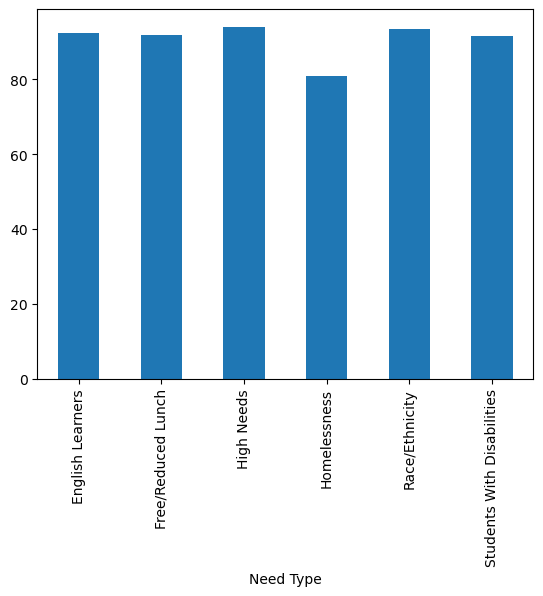

In [14]:
avg_attendance_by_need_type.plot.bar()

In [15]:
avg_attendance_by_district_name = df.groupby('District name')['2020-2021 attendance rate'].mean() #aggregate the attendance rate per district name
avg_attendance_by_district_name.head()

District name
Achievement First Bridgeport Academy District    93.976667
Achievement First Hartford Academy District      90.536667
Amistad Academy District                         93.915556
Andover School District                          95.945000
Ansonia School District                          89.311818
Name: 2020-2021 attendance rate, dtype: float64

<Axes: xlabel='District name'>

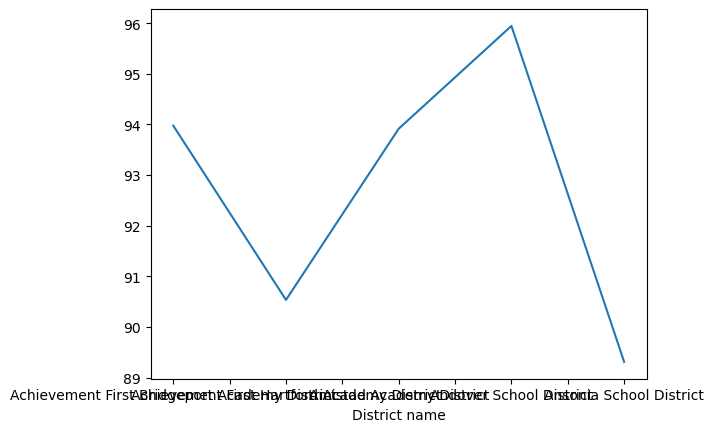

In [16]:
avg_attendance_by_district_name.head().plot()

<Axes: xlabel='District name'>

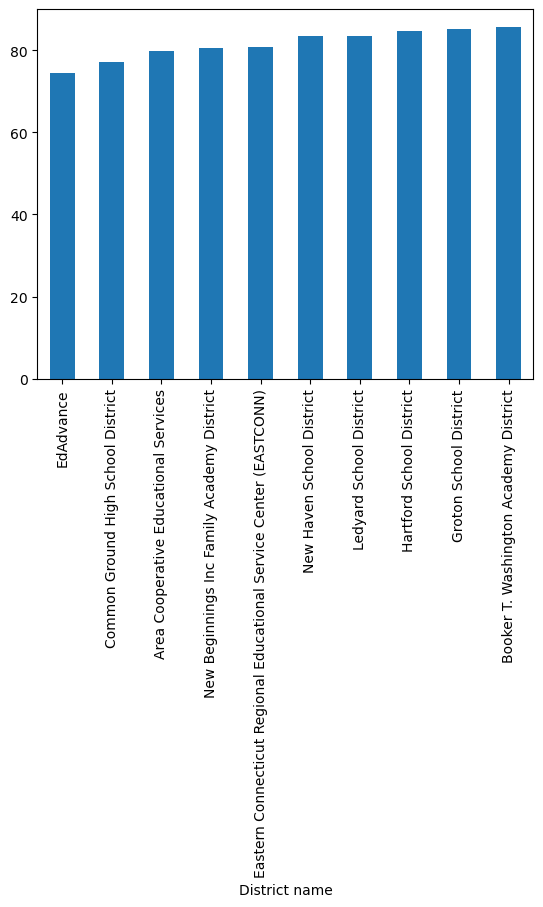

In [17]:
mean_att_rate_by_district = df.groupby('District name')['2020-2021 attendance rate'].mean() # calculate the average attendance rates per district
mean_att_rate_by_district.nsmallest(10).plot.bar() # use a bar chart to show the results of the smallest 10 districts 

In [18]:
#df.plot.scatter(x='district name',y='2020-2021 attendance rate') #use scatter plot to show the result

### Utilizing AI

In [19]:
pip install jupyter-ai~=1.0

  Using cached aiosqlite-0.20.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached jupyter_ydoc-0.2.5-py3-none-any.whl.metadata (2.2 kB)
  Using cached jupyter_server_ydoc-0.8.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached nbclassic-1.1.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached notebook-6.5.7-py3-none-any.whl.metadata (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jupyter_server_fileid-0.9.3-py3-none-any.whl.metadata (4.7 kB)
  Using cached ypy_websocket-0.8.4-py3-none-any.whl.metadata (2.5 kB)
  Using cached y_py-0.6.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 9

In [20]:
pip install jupyter-ai[all]

INFO: pip is looking at multiple versions of langchain-anthropic to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-aws to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-cohere to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-mistralai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-nvidia-ai-endpoints to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-ollam

In [21]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)


In [ ]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

OperationalError: connection to server at "ia340.cixcleuqzhmr.us-east-1.rds.amazonaws.com" (184.72.100.192), port 5432 failed: Connection timed out
	Is the server running on that host and accepting TCP/IP connections?


In [ ]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [ ]:
%load_ext jupyter_ai_magics

In [ ]:
%ai list

In [ ]:
%%ai gpt4
What is in the {df} in {In[10]}

### Question 1

In [ ]:
%%ai gpt4 -f code

Calculate which district had the lowest attendance rate from 2020-2021? 
Which district had the highest?

what are the results?

In [ ]:
# Find the district with the lowest attendance rate in 2020-2021
lowest_attendance_district = df[df['2020-2021 attendance rate'] == df['2020-2021 attendance rate'].min()]['District name'].iloc[0]

# Find the district with the highest attendance rate in 2020-2021
highest_attendance_district = df[df['2020-2021 attendance rate'] == df['2020-2021 attendance rate'].max()]['District name'].iloc[0]

print("District with lowest attendance rate (2020-2021): ", lowest_attendance_district)
print("District with highest attendance rate (2020-2021): ", highest_attendance_district)

### Question 2

In [ ]:
%%ai gpt4 -f code

Calculate which need type had the lowest attendance rate from 2020-2021?

What are the results?

In [ ]:
# Assuming 'df' is your DataFrame and it has columns 'Need Type' and '2020-2021 attendance rate'

# Group by need type and calculate mean attendance rate
grouped_df = df.groupby('Need Type')['2020-2021 attendance rate'].mean()

# Find the need type with the lowest attendance rate
lowest_need_type = grouped_df.idxmin()
lowest_rate = grouped_df.min()

lowest_need_type, lowest_rate

### Question 3

In [ ]:
%%ai gpt4 -f code

Does need type have a significant impact on attendance rate? How so?

Do not use numpy

Can you show the results in a table

In [ ]:
# Assuming 'df' is your DataFrame and it has columns '2020-2021 attendance rate' and 'Need Type'
# We can use a t-test from the scipy library to determine if 'Need Type' has a significant impact on '2020-2021 attendance rate'.

import scipy.stats as stats

# Group the data by 'Need Type'
grouped = df.groupby('Need Type')

# Create lists to store the 'Need Type' and corresponding t-statistics and p-values
need_types = []
t_stats = []
p_values = []

# Conduct a t-test for each group against the entire '2020-2021 attendance rate' population
# Store the t-statistics and p-values in the respective lists
for name, group in grouped:
    t_stat, p_value = stats.ttest_ind(df['2020-2021 attendance rate'], group['2020-2021 attendance rate'])
    need_types.append(name)
    t_stats.append(t_stat)
    p_values.append(p_value)

# Create a DataFrame to store 'Need Type', 'T-statistic', and 'P-value'
df_results = pd.DataFrame({'Need Type': need_types, 'T-statistic': t_stats, 'P-value': p_values})

# Display the DataFrame
print(df_results)

### Question 4

In [ ]:
%%ai gpt4 -f code

Can you create a scatterplot with the need type and 2020-2021 attendance rate

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has columns 'Need Type', '2020-2021 Attendance Rate'
plt.scatter(df['Need Type'], df['2020-2021 attendance rate'])
plt.title('Scatterplot of Need Type vs 2020-2021 attendance rate')
plt.xlabel('Need Type')
plt.ylabel('2020-2021 attendance rate')
plt.grid(True)
plt.show()


### Question 5

In [ ]:
%%ai gpt4 -f code

Can you create a scatterplot with the 2020-2021 student count and 2020-2021 attendance rate and district name

Do not provide key for the scatterplot

Do not use numpy

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has columns '2020-2021 Student Count', '2020-2021 Attendance Rate' and 'District Name'
districts = df['District name'].unique()

for district in districts:
    district_data = df[df['District name'] == district]
    plt.scatter(district_data['2020-2021 student count'], district_data['2020-2021 attendance rate'])

plt.title('Scatterplot of 2020-2021 Student Count vs 2020-2021 Attendance Rate')
plt.xlabel('2020-2021 Student Count')
plt.ylabel('2020-2021 Attendance Rate')
plt.show()

# Question 6: AI Analysis Interpretations

### The first question posed to AI was what school district has the highest vs. lowest attendance rate. OpenAI used min() and max() functions in the equations that it generated for calculating these. EdAdvance had the lowest attendance rate and Deep River School District had the highest attendance rate

### The second question asked what student need type had the lowest attendance rate. AI grouped the data by need type and then found the lowest mean, showing that Homelessness was the student need that resulted in the lowest attendance rate.

### Since need type seemed to influence attendance rates, we asked AI if that was statistically significant. It tried to use numpy to do this, but then we reworded the prompt to do this differently. It produced P-Values for each need type

### We also used need type as a variable to create a scatterplot showing attendance rate. This visualization showed the stark difference between attendance rates of students experiencing homelessness vs. students with different needs.

### A different scatterplot was created to address student count's relationship with attendance rate and the school district name, and while one was produced, it does not provide very helpful information for analyzing data trends. 